# COGS 108 - Final Project 

*Fill in your overview here*

# Names

- Mariam Issa
- Andrea Sudharta
- Payam Sadeghian
- Brandon Amaral
- Alex Luo
- Jun Wang

# Group Members IDs

- A12285140
- A14497101
- A13654507
- A14133689
- A########
- A15743932

# Research Question

How consistent are Congressmen/Congresswomen with the beliefs they state on Twitter and how they vote on various issues in Congress?

## Background and Prior Work

The US government relies on its congress to check the powers of the president and other branches of government. One would expect to see nothing but honesty in this crucial cog of our government. It is shocking that members of Congress are some of the least trusted professionals. As Americans we assume those elected to serve us would want to preserve their reputation for honesty, but many people understand this isn't the case. Has lying become the norm for so long, that people have stopped caring?  
  
The Truther Tweet Team will uncover the reality of our government practices. In this project, we will analyze data to understand voting patterns and honesty in politicians and aim to uncover the deceivers in our congress. We will scan the Twitter accounts of Congress members, taking key words and hashtags for hot topics, and compare their word against their voting patterns. Finally, we will use statistical tests to decipher which members are significantly dishonest and those who aren’t.
        
Over the years the public’s primary source of information has switched from Newspaper to Television and now to the Internet. Specifically, politicians have taken a liking to the social media platform, Twitter, to spread proposals. The hashtag tool, the like, and the retweet features have proven effective in spreading information to members with the same ideological standing. Essentially, the political left and the political right have split into two groups on social media. This may result in people not checking the information they see or what those they follow vote. They mostly attack each other and think less of the other group. This environment is perfect for lying politicians to gain support from the average member of the political party. We predict some members are greater liars than others. In this study we aim to uncover those who tend to lie, a lot.    
    
In other projects, those mainly research Trump’s impact on politics. The president is known as an excessive liar. Since Trumps’ introduction into politics, political analysts have seen a rise in lying accompanied by a defense of ‘fake news’ and ‘alternative facts’ against said lies. Other politicians have taken to such practices and we have one of the greatest problems in modern politics, excessive lying. “The Trump regime can be seen as post truth and hyper-Orwellian in its use of blatant lies, propaganda, and pure bullshit”. We can conclude that Trump has created an environment for lying politicians to grow.


References:
 1.  https://www.forbes.com/sites/niallmccarthy/2019/01/11/americas-most-least-trusted-professions-infographic/#195b387c7e94
 2. https://link.springer.com/chapter/10.1007/978-981-10-8013-5_7

# Hypothesis

H0: Both parties have the same consistency scores under 90% significant level. We predict that members of Congress will be mostly consistent between their tweets and their voting behavior, because of the easily accessible information that is available to the public (such as their voting ballots on GovTrack.us).  Coupling this watchdog effect, is the vast number of  media sources that serve to broadcast any unethical behavior from congress members, such as misleading and lying to their constituents on a platform such as Twitter.  The reason we are not predicting a 100% consistency in voting behaviors and Tweets is due to a lack of attentiveness of the American public in regards to how their representative votes, despite the easily-accessible information. Additionally, these past decades have witnessed a disappearance of investigative journalism, which means there may be a possibility of congress members voting with misaligned incentives due to low-risk repercussions.  This is an assumption that we would like to study in this project, because the extent of which this assumption is true will expose how honest congress members are to their constituents and to the general public.

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
import pandas as pd
import numpy as np
import tweepy
from bs4 import BeautifulSoup
import datetime
from datetime import timedelta
import requests
import time
import matplotlib.pyplot as plt

In [2]:
tweeters_dem_df = pd.read_csv('popular-tweeters-dem.csv') #Dataframe for list of Democratic Party politicians
tweeters_rep_df = pd.read_csv('popular-tweeters-rep.csv') #Dataframe for list of Republican Party politicians
tweeters_dem_df['Party'] = 'D'
tweeters_rep_df['Party'] = 'R'
tweeters_df = pd.concat([tweeters_dem_df, tweeters_rep_df], ignore_index = True) # Dataframe for combined list of politicians

tweeters_handle = list(tweeters_df['Twitter_Handle']) #Python list for politician Twitter handles

In [3]:
# Get OAuth from Twitter
import tweepy

consumer_key = 'bSZRBubFkHWewMi08ltv7DgAu'
consumer_secret = '6JFpZu66GT7OvoJFFxSfJJlX21NH5wxmMjNDbsQGPLyW9WtBSU'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

try:
    redirect_url = auth.get_authorization_url()
    print (redirect_url)
    
except tweepy.TweepError:
    print("Error! Failed to get request token.")

https://api.twitter.com/oauth/authorize?oauth_token=Wac9kAAAAAAA-UgvAAABa0jG7DU


In [ ]:
# Verify Twitter account usage
# NORUN
verifier = raw_input('Verifier:')

In [ ]:
# Get Access Token
# NORUN
try: 
    auth.get_access_token(verifier)
except tweepy.TweepError:
    print ("Error! Failed to get access token.")

In [ ]:
# Save tokens
# NORUN
access_token = auth.access_token
acess_token_secret = auth.access_token_secret

# Note: You do not need to re-fetch it each time. Twitter currently does
# not expire the tokens, so the only time it would ever go invalid is if
# the user revokes our application access. 

#To rebuild an OAuthHandler from the stored access token

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(key, secret)

In [ ]:
# Check Set Up
api = tweepy.API(auth)
#api.update_status('tweepy + oauth!') # Posts directly on my timeline

In [5]:
# Filter tweets to only include those containing key words
key_words_by_bill = {
    0:['#savetheinternet', '#netneutrality', 'internet', 'neutrality'], 
    1:['#medicareforall', '#universalhealthcare','#healthcare', 'health', 'care', 'health', 'care', 'medicare'], 
    2: ['#equalpay', '#equalrights', '#equalrightsammendment', '#era', '#women', '#genderinequality', '#genderequality', 'equal', 'rights', 'pay', 'women', 'gender', 'equality'],
    3:['#votingrights', '#votingrightact', '#electionintegrity', '#riggedelections', '#forthepeople', 'voting', 'rights', 'elections', 'fair', 'vote', 'votes'], 
    4:['#guncontrol', '#2ndammendment', '#noguncontol', '#gunviolence', '#gunrights', '#gunreform', '#2a', 'gun', 'second', '2nd',  'amendment'], 
    5:['#yemen', '#yemengenocide', 'yemen', 'yemeni', 'war', 'troops', 'withdraw troops', 'civil'], 
    6:['#women', '#reauthorizationact', '#violenceagainstwomen', '#genderbasedviolence', '#sexualviolence', 'women'],  
    7:['#buildthewall', '#buildthewallnow', '#nationalsecurity', '#nationalemergency', '#trumpswall', '#illegalimmigration', '#mexico', '#border', '#bordercrises', 'mexico', 'illegal', 'immigration', 'security', 'emergency', 'build', 'wall']
}

key_words = list({x for v in key_words_by_bill.values() for x in v})



In [6]:
# Define Intersection Function
def interSection(arr1,arr2): 
    return list(filter(lambda x: x in arr1, arr2)) 

In [7]:
# Collect all tweets that deal with each bill in Congress
bill = [{}] * 8 # bill[bill_number] = {congressman: [tweets about bill]}
tweets = {}

In [8]:
bill_title = {
    0: "Save the Internet",
    1: "Health Care",
    2: "Paycheck Fairness Act",
    3: "For the People Act 2019",
    4: "Background Check for Firearms",
    5: "Remove Troops from Yemen",
    6: "Violence against Women Reauthorization Act",
    7: "Trump's National Emergency"
}

In [ ]:
#Iterate through Congressmen
# NORUN - TAKES FOREVER TO RUN
for handle in tweeters_handle:
    all_tweets = []

    for i in range(1000):
        try:
            tweets_from_page_i = api.user_timeline(handle, count = 200, page = i) # max count value is 200
        except:
            print("TweepError: stopped at handle: ", handle, " at page ", i)
        
        # Check if we reached end of Twitter history
        if len(tweets_from_page_i) == 0: 
            break
            
        #iterate through each tweet, sort by bill
        for tweet in tweets_from_page_i:
            tweet_tokens = (tweet.text).lower().split()
            
            # See if Tweet talks about bill matter
            for bill_number, bill_tokens in key_words_by_bill.items():
                if len(interSection(tweet_tokens, bill_tokens)) != 0:
                    if bill[bill_number] == {}:
                        bill[bill_number] = {handle:[tweet.text]}
                    else:
                        if handle not in bill[bill_number]:
                            bill[bill_number][handle] = [tweet.text]
                        else:
                            bill[bill_number][handle] += [tweet.text]
                    
                    # Compile to all tweets list
                    all_tweets.append(tweet.text)
                    
    # Collect congressman/woman's tweets         
    tweets[handle] = all_tweets
        
    # Sleep: to not overload Twitter requests
    time.sleep(45)

In [ ]:
#Create look up table for Congressman/woman's name and party
# NORUN - TAKES FOREVER TO RUN
tweeters_party = list(tweeters_df['Party'])
tweeters_name = list(tweeters_df['Name'])

handle_to_party = {}
handle_to_name = {}
for i, handle in enumerate(tweeters_handle):
    handle_to_party[handle] = tweeters_party[i]
    handle_to_name[handle] = tweeters_name[i]

data = [] 

# List all tweets by bill it's associated with and the congressman who tweeted it
for i in range(len(bill)):
    for handle, tweet in bill[i].items():
        data.append([handle_to_name[handle], handle_to_party[handle], handle, bill_title[i], tweet])
        
tweeters_df = pd.DataFrame(data, columns = ['Name', 'Party', 'Twitter Handle', 'Bill #', 'Tweet'])

# Export CSV with Tweets
tweeters_df.to_csv('tweets_by_bill')

# Data Cleaning

We created the Twitter dataset in the duration of this project, which meant that a number of the cleaning steps were carried out in the creation of the dataset. Since we chose to answer our data science question by selecting eight bills that were voted on in the 116th Congress, we filtered each representative’s Twitter history by only selecting Tweets that discerned one of the eight bills.  This was executed by checking whether or not the Tweet contained key words from the bill or a particular hashtag, demonstrating support for or against the bill. The last step taken in cleaning this data was the removal of any non-English words in the Tweet, which was due to the Tweepy library failing to remove all HTML code in the text part of the tweet. Python’s string function: isalpha() was used to remove these invalid parts of the Tweet text.  

As for the eight GovTrack CSV files, which contained the votes on all eight bills, the cleaning stage of this dataset involved dropping all rows of congress people who were not selected for analysis. After this first step was taken, the eight CSV files were then merged into a single CSV file, where each row contained a representative and a column corresponding to their party, state, and their votes on the eight bills.  In this step, concern was raised on whether these cleaning steps were properly done since many representatives did not vote on any of the bills. After careful inspection, it was deducted that many representatives were not voting on any of these bills, which is particularly interesting since the congress people were selected by how active and popular they are on Twitter.  

With these two datasets cleaned, the next step involved pre-processing the tweets into a numerical representation so that they can be directly compared to their voting pattern, which took on a value of ‘Yay, ‘Nay’, or ‘NA’ (no vote).  In order to categorize the tweets into the main two categories, we had to take a hybrid approach on how the text sentiment was conducted.  Detailed in the bill_sentiment() block of code (which was the function responsible for the text sentiment analysis), each bill contained key words or hashtags that inarguably reveals that politician’s sentiment  on the bill e.g. #trumpswall, which shows clear support for the bill of condemning Trump’s National Emergency to fund building the Mexican-American wall and the hashtag: #illegalimmigration, which supports Trump’s National Emergency, indicating a vote against the bill.  After this initial analysis, further sentiment analysis was carried out by utilizing Google’s Natural Language Processing Text Sentiment Analysis Cloud Tool to categorize the data. This step was particularly difficult to do since the NLP tool could only estimate the positivity and negativity of a tweet and since many congressmen’s tweets on Twitter are of a condescending tone, discerning their view on the topic was beyond the scope of analysis that could be done.  

This was a critical limitation on our project because deducing the sentiment in regards to whether or not they approve or disapprove of a bill is a Natural Language Processing Task that leading Deep Learning Researchers are conducting their research on.  Despite this, the Google NLP tool was still used to get the sentiment score, a number between -1 (negative) and 1 (positive) and depending on the bill, this number was multiplied by -1 to capture whether the congress person would vote for or against a bill (this was done to standardize the sentiment and align the sentiment score with the predicted vote on a bill). After this step, the list of tweet texts, pertaining to each bill, became a list of sentiment scores, which was then averaged into a single number.  Finally, this score was converted into a 1 if it fell in the range [0.1, 1.0] to indicate support for the bill, a 0 if the score fell in the range [-0.1, 0.1] for a NA (no vote), or -1 if it fell between [-1.0, -0.1], as a vote against the bill.  After these cleaning steps, the dataset was set up to do a simple comparison between their predicted Tweet sentiment score and their recorded vote.

In [12]:
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
import os


In [13]:
# pass in a string
def sentimentAnalysis(text):
    document = types.Document(content=text, type=enums.Document.Type.PLAIN_TEXT)
    
    # Detects the sentiment of the text
    sentiment = client.analyze_sentiment(document=document).document_sentiment
    
    return sentiment.score, sentiment.magnitude
    

In [ ]:
from nltk.tokenize import word_tokenize
# NORUN - TAKES FOREVER TO RUN

tweets_df = pd.read_csv('tweets_by_bill')

all_sentiment_scores = []
avg_scores = []
mdn_scores = []
rng_scores = [] 
var_scores = [] 
std_dev_scores = []

for bill, tweets in zip(tweets_df['Bill #'], tweets_df['Tweet']):
    
    tweet_scores = []
    
    for twt in tweets.split('u\''): 
        # Clean tweet
        twt = ' '.join([word.lower() for word in twt.split(' ') if word.isalpha()])
        
        # Skip empty strings
        if twt == '': continue 
            
        # To not overload Google API
        time.sleep(1)
            
        # Evaluate by bill
        tweet_scores.append(bill_sentiment(twt, bill))
    
        
    # Add list of scores to Dataframe
    all_sentiment_scores.append(tweet_scores)
    
    # Get AVERAGE tweet sentiment score
    avg = sum(tweet_scores) * 1.0 / len(tweet_scores)
    avg_scores.append(avg)
        
    # Get MEDIAN tweet sentiment score
    sorted_tweet_scores = sorted(tweet_scores)
    mdn = sorted_tweet_scores[len(tweet_scores) / 2]
    mdn_scores.append(mdn)
        
    # Get RANGE tweet sentiment score
    rng = sorted_tweet_scores[len(tweet_scores) - 1] - sorted_tweet_scores[0]
    rng_scores.append(rng)
        
    # Get VARIANCE tweet sentiment score
    if len (tweet_scores) <= 1:
        var = sum([(score - avg)**2 for score in tweet_scores]) 
    else:
        var = sum([(score - avg)**2 for score in tweet_scores]) * 1.0 / (len(tweet_scores) - 1)
    var_scores.append(var)
    
    # Get STD DEVIATION tweet sentiment score
    std_dev = var**(1/2)
    std_dev_scores.append(std_dev)
         
# Add to dataframe
tweets_df['Sentiment Scores'] = all_sentiment_scores
tweets_df['Average'] = avg_scores
tweets_df['Median'] = mdn_scores
tweets_df['Range'] = rng_scores
tweets_df['Variance'] = var_scores
tweets_df['Standard Deviation'] = std_dev_scores

# Export new file
tweets_df.to_csv('tweet_sentiment_analysis')

In [14]:
#Note: 1 >= score > 0    Vote YES on bill
#      0 >= score >= -1  Vote NO on bill
def bill_sentiment(tweet, bill):
    if bill == "Save the Internet":
        if ('#savetheinternet' in tweet) or ('#netneutrality' in tweet) or ('neutrality' in tweet):
            return 1.0
        
        score, mag = sentimentAnalysis(tweet)
        
        return -1 * score
               
    elif bill == "Health Care":
        if ('#medicareforall' in tweet) or ('#universalhealthcare' in tweet):
            return 1.0
        
        score, mag = sentimentAnalysis(tweet)
        
        return -1 * score
        
    elif bill == "Paycheck Fairness Act":
        if 'genderinequality' in tweet:
            return 1.0
        
        score, mag = sentimentAnalysis(tweet)
        
        return -1 * score
        
    elif bill == "For the People Act 2019":
        if ('#votingrights' in tweet) or ('#riggedelections' in tweet) or ('#forthepeople' in tweet):
            return 1.0
   
        score, mag = sentimentAnalysis(tweet)
        
        return -1 * score
        
    elif bill == "Background Check for Firearms":
        if ('#guncontrol' in tweet) or ('#gunviolence' in tweet) or ('gunreform' in tweet):
            return 1.0
        if ('#gunrights' in tweet) or  ('noguncontrol' in tweet):
            return -1.0
        
        score, mag = sentimentAnalysis(tweet)
        
        return score
        
    
    elif bill == "Remove Troops from Yemen":
        if '#yemengenocide' in tweet:
            return 1.0
        
        score, mag = sentimentAnalysis(tweet)
        
        return -1 * score
    
    elif bill == "Violence against Women Reauthorization Act":
        if ('#violenceagainstwomen' in tweet) or ('#genderbasedviolence' in tweet) or ('#sexualviolence' in tweet):
            return 1.0
        
        score, mag = sentimentAnalysis(tweet)
        
        return -1 * score
    
    elif bill == "Trump's National Emergency":
        if  '#trumpswall' in tweet:
            return 1.0
        
        if ('#buildthewall' in tweet) or ('#buildthewallnow' in tweet) or ('#bordercrises' in tweet) or ('#illegalimmigration' in tweet) or ('illegal' in tweet):
            return -1.0
        
        score, mag = sentimentAnalysis(tweet)
        
        return -1 * score
              
    else:
        return 0

Describe your data cleaning steps here.

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [15]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
dataAnalysis = pd.read_csv('tweet_counts.csv')
dataAnalysis
dataAnalysis.describe()

,Background Check for Firearms,For the People Act 2019,Health Care,Paycheck Fairness Act,Remove Troops from Yemen,Save the Internet,Trump's National Emergency,Violence against Women Reauthorization Act
count,116.000000,116.000000,116.000000,117.000000,115.000000,110.000000,117.000000,117.000000
mean,45.681034,96.517241,96.017241,97.991453,30.356522,11.318182,76.341880,48.145299
std,36.887985,53.994925,66.037405,66.894474,31.470730,12.732918,42.527509,39.478992
min,5.000000,6.000000,9.000000,2.000000,2.000000,1.000000,6.000000,1.000000
25%,20.000000,61.500000,44.750000,49.000000,16.000000,3.000000,47.000000,21.000000
50%,37.500000,93.500000,85.000000,76.000000,23.000000,7.000000,68.000000,33.000000
75%,55.000000,126.750000,131.500000,136.000000,32.500000,13.750000,98.000000,59.000000
max,292.000000,450.000000,361.000000,356.000000,267.000000,68.000000,279.000000,179.000000


In [16]:
billAnalysis = pd.read_csv('tweets_by_bill')
billAnalysis

,Unnamed: 0,Name,Party,Twitter Handle,Bill #,Tweet
0,0,Earl Blumenauer,D,@repblumenauer,Save the Internet,[u'Maintaining a free and open internet is cri...
1,1,Daniel Webster,R,@RepWebster,Save the Internet,"[u'Great to tour @ThatCompanycom, an internet ..."
2,2,John Barrasso,R,@SenJohnBarrasso,Save the Internet,[u'RT @Senate_RPC: [New] The internet thrived ...
3,3,Louie Gohmert,R,@RepLouieGohmert,Save the Internet,"[u'""The bill is referred to as net neutrality ..."
4,4,Steve King,R,@SteveKingIA,Save the Internet,[u'Not one gray head in entire packed gallery ...
5,5,Ted Yoho,R,@RepTedYoho,Save the Internet,[u'RT @HouseGOP: Democrats\u2019 partisan plan...
6,6,Mitch McConnell,R,@senatemajldr,Save the Internet,"[u""RT @CNBC: John Thune: We can't let 'politic..."
7,7,Maxine Waters,D,@RepMaxineWaters,Save the Internet,"[u""RT @freepress: Today at noon, the Voices fo..."
8,8,Terri Sewell,D,@RepTerriSewell,Save the Internet,"[u""I'm proud to vote for the #SaveTheNet Act t..."
9,9,Mo Brooks,R,@RepMoBrooks,Save the Internet,[u'Proud to support passage of #HR3086 to perm...


In [17]:
billAnalysis['Twt_Count'] = billAnalysis['Tweet'].apply(lambda x: len(x))

count_pivot = billAnalysis.pivot_table(index = 'Name', columns = 'Bill #', values = 'Twt_Count')

billAnalysis

,Unnamed: 0,Name,Party,Twitter Handle,Bill #,Tweet,Twt_Count
0,0,Earl Blumenauer,D,@repblumenauer,Save the Internet,[u'Maintaining a free and open internet is cri...,3435
1,1,Daniel Webster,R,@RepWebster,Save the Internet,"[u'Great to tour @ThatCompanycom, an internet ...",281
2,2,John Barrasso,R,@SenJohnBarrasso,Save the Internet,[u'RT @Senate_RPC: [New] The internet thrived ...,150
3,3,Louie Gohmert,R,@RepLouieGohmert,Save the Internet,"[u'""The bill is referred to as net neutrality ...",685
4,4,Steve King,R,@SteveKingIA,Save the Internet,[u'Not one gray head in entire packed gallery ...,304
5,5,Ted Yoho,R,@RepTedYoho,Save the Internet,[u'RT @HouseGOP: Democrats\u2019 partisan plan...,459
6,6,Mitch McConnell,R,@senatemajldr,Save the Internet,"[u""RT @CNBC: John Thune: We can't let 'politic...",819
7,7,Maxine Waters,D,@RepMaxineWaters,Save the Internet,"[u""RT @freepress: Today at noon, the Voices fo...",885
8,8,Terri Sewell,D,@RepTerriSewell,Save the Internet,"[u""I'm proud to vote for the #SaveTheNet Act t...",1154
9,9,Mo Brooks,R,@RepMoBrooks,Save the Internet,[u'Proud to support passage of #HR3086 to perm...,96


lower bound: -32.5
upper bound: 107.5
5 outliers exceed our upper bound of 107.5
Robin Kellyis an outlier for Background Check for Firearms at 292 tweets
Katherine Clarkis an outlier for Background Check for Firearms at 150 tweets
Thomas Massie is an outlier for Background Check for Firearms at 118 tweets
Brenda Lawrenceis an outlier for Background Check for Firearms at 115 tweets
Suzanne Bonamiciis an outlier for Background Check for Firearms at 113 tweets


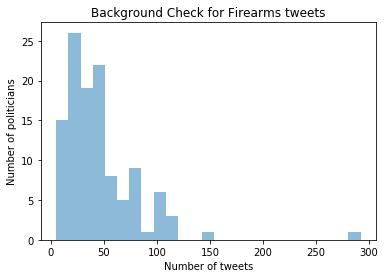

In [18]:
dataAnalysis['Background Check for Firearms'].plot.hist(bins=25, alpha=0.5)
f1 = plt.gcf()
plt.title('Background Check for Firearms tweets')
plt.xlabel('Number of tweets')
plt.ylabel('Number of politicians')
backData = dataAnalysis['Background Check for Firearms'].dropna()
q1, q3= np.percentile(sorted(backData),[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print("lower bound:", lower_bound)
print("upper bound:", upper_bound)
dataAnalysis['Background Check for Firearms'].sort_values(ascending = False)
print("5 outliers exceed our upper bound of", upper_bound)
print(dataAnalysis.loc[93, 'Name']+ "is an outlier for Background Check for Firearms at 292 tweets")
print(dataAnalysis.loc[59, 'Name']+ "is an outlier for Background Check for Firearms at 150 tweets")
print(dataAnalysis.loc[110, 'Name']+ "is an outlier for Background Check for Firearms at 118 tweets")
print(dataAnalysis.loc[14, 'Name']+ "is an outlier for Background Check for Firearms at 115 tweets")
print(dataAnalysis.loc[106, 'Name']+ "is an outlier for Background Check for Firearms at 113 tweets")

lower bound: -36.375
upper bound: 224.625
two outliers exceed our upper bound of 224.625
Terri Sewellis an outlier for For the People Act 2019 at 450 tweets
Marc Veaseyis an outlier for For the People Act 2019 at 231 tweets


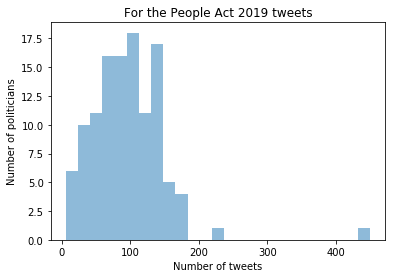

In [19]:
dataAnalysis['For the People Act 2019'].plot.hist(bins=25, alpha=0.5)
f2 = plt.gcf()
plt.title('For the People Act 2019 tweets')
plt.xlabel('Number of tweets')
plt.ylabel('Number of politicians')
forPeopleData = dataAnalysis['For the People Act 2019'].dropna()
q1, q3= np.percentile(sorted(forPeopleData),[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print("lower bound:", lower_bound)
print("upper bound:", upper_bound)
dataAnalysis['For the People Act 2019'].sort_values(ascending = False)
print("two outliers exceed our upper bound of", upper_bound)
print(dataAnalysis.loc[109, 'Name']+ "is an outlier for For the People Act 2019 at 450 tweets")
print(dataAnalysis.loc[67, 'Name']+ "is an outlier for For the People Act 2019 at 231 tweets")

lower bound: -85.375
upper bound: 261.625
Pramila Jayapalis an outlier for Health Care at 361 tweets
Joe Kennedyis an outlier for Health Care at 307 tweets
Kathy Castoris an outlier for Health Care at 280 tweets


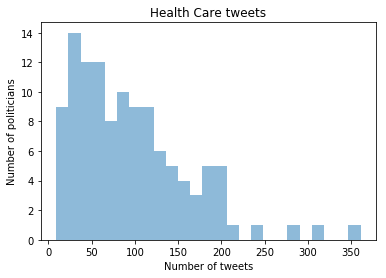

In [20]:
dataAnalysis['Health Care'].plot.hist(bins=25, alpha=0.5)
f3 = plt.gcf()
plt.title('Health Care tweets')
plt.xlabel('Number of tweets')
plt.ylabel('Number of politicians')
healthCareData = dataAnalysis['Health Care'].dropna()
q1, q3= np.percentile(sorted(healthCareData),[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)
print("lower bound:", lower_bound)
print("upper bound:", upper_bound)
dataAnalysis['Health Care'].sort_values(ascending = False)
print(dataAnalysis.loc[88, 'Name']+ "is an outlier for Health Care at 361 tweets")
print(dataAnalysis.loc[47, 'Name']+ "is an outlier for Health Care at 307 tweets")
print(dataAnalysis.loc[60, 'Name']+ "is an outlier for Health Care at 280 tweets")

lower bound: -81.5
upper bound: 266.5
There are 3 outliers that exceed the upper bound of 266.5
Terri Sewellis an outlier for Paycheck Fairness Act at 356 tweets
Barbra Leeis an outlier for Paycheck Fairness Act at 284 tweets
Brenda Lawrenceis an outlier for Paycheck Fairness Act at 278 tweets


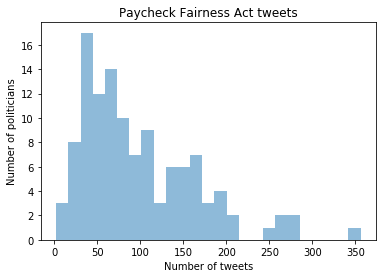

In [21]:
dataAnalysis['Paycheck Fairness Act'].plot.hist(bins=25, alpha=0.5)
f4 = plt.gcf()
plt.title('Paycheck Fairness Act tweets')
plt.xlabel('Number of tweets')
plt.ylabel('Number of politicians')
q1, q3= np.percentile(sorted(dataAnalysis['Paycheck Fairness Act']),[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print("lower bound:", lower_bound)
print("upper bound:", upper_bound)
dataAnalysis['Paycheck Fairness Act'].sort_values(ascending = False)
print("There are 3 outliers that exceed the upper bound of", upper_bound)
print(dataAnalysis.loc[109, 'Name']+ "is an outlier for Paycheck Fairness Act at 356 tweets")
print(dataAnalysis.loc[7, 'Name']+ "is an outlier for Paycheck Fairness Act at 284 tweets")
print(dataAnalysis.loc[14, 'Name']+ "is an outlier for Paycheck Fairness Act at 278 tweets")

lower bound: -8.75
upper bound: 57.25
Ro Khanna is an outlier for Remove Troops from Yemen at 267 tweets
Barbra Lee is an outlier for Remove Troops from Yemen at 142 tweets
Tulsi Gabbard is an outlier for Remove Troops from Yemen at 117 tweets
Terri Sewell is an outlier for Remove Troops from Yemen at 89 tweets
Seth Moulton is an outlier for Remove Troops from Yemen at 87 tweets
Joe Kennedy is an outlier for Remove Troops from Yemen at 83 tweets
Mark Pocan is an outlier for Remove Troops from Yemen at 71 tweets
Adam Schiff is an outlier for Remove Troops from Yemen at 70 tweets
Ted Lieu is an outlier for Remove Troops from Yemen at 66 tweets
Thomas Massie  is an outlier for Remove Troops from Yemen at 65 tweets
Ruben Gallego is an outlier for Remove Troops from Yemen at 61 tweets
Adam Kinzinger is an outlier for Remove Troops from Yemen at 59 tweets


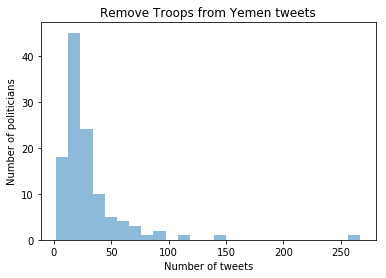

In [22]:
dataAnalysis['Remove Troops from Yemen'].plot.hist(bins=25, alpha=0.5)
f5 = plt.gcf()
plt.title('Remove Troops from Yemen tweets')
plt.xlabel('Number of tweets')
plt.ylabel('Number of politicians')
YemenData = dataAnalysis['Remove Troops from Yemen'].dropna()
q1, q3= np.percentile(sorted(YemenData),[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print("lower bound:", lower_bound)
print("upper bound:", upper_bound)
dataAnalysis['Remove Troops from Yemen'].sort_values(ascending = False)
#number 91 is an outlier at 267 tweets.
print(dataAnalysis.loc[91, 'Name']+ " is an outlier for Remove Troops from Yemen at 267 tweets")
print(dataAnalysis.loc[7, 'Name']+ " is an outlier for Remove Troops from Yemen at 142 tweets")
print(dataAnalysis.loc[113, 'Name']+ " is an outlier for Remove Troops from Yemen at 117 tweets")
print(dataAnalysis.loc[109, 'Name']+ " is an outlier for Remove Troops from Yemen at 89 tweets")
print(dataAnalysis.loc[99, 'Name']+ " is an outlier for Remove Troops from Yemen at 87 tweets")
print(dataAnalysis.loc[47, 'Name']+ " is an outlier for Remove Troops from Yemen at 83 tweets")
print(dataAnalysis.loc[73, 'Name']+ " is an outlier for Remove Troops from Yemen at 71 tweets")
print(dataAnalysis.loc[1, 'Name']+ " is an outlier for Remove Troops from Yemen at 70 tweets")
print(dataAnalysis.loc[107, 'Name']+ " is an outlier for Remove Troops from Yemen at 66 tweets")
print(dataAnalysis.loc[110, 'Name']+ " is an outlier for Remove Troops from Yemen at 65 tweets")
print(dataAnalysis.loc[94, 'Name']+ " is an outlier for Remove Troops from Yemen at 61 tweets")
print(dataAnalysis.loc[0, 'Name']+ " is an outlier for Remove Troops from Yemen at 59 tweets")

lower bound: -13.125
upper bound: 29.875
Sean Maloney is an outlier for Save the Internet at 68 tweets
Tulsi Gabbard is an outlier for Save the Internet at 56 tweets
Ro Khanna is an outlier for Save the Internet at 50 tweets
Kathy Castor is an outlier for Save the Internet at 49 tweets
Nancy Pelosi is an outlier for Save the Internet at 42 tweets
Bob Latta is an outlier for Save the Internet at 42 tweets
Peter Welch is an outlier for Save the Internet at 41 tweets
Mark Pocan is an outlier for Save the Internet at 39 tweets


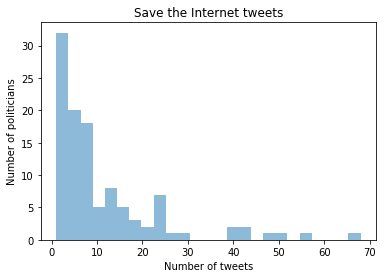

In [23]:
dataAnalysis['Save the Internet'].plot.hist(bins=25, alpha=0.5)
f6 = plt.gcf()
plt.title('Save the Internet tweets')
plt.xlabel('Number of tweets')
plt.ylabel('Number of politicians')
saveInternetData = dataAnalysis['Save the Internet'].dropna()
q1, q3= np.percentile(sorted(saveInternetData),[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print("lower bound:", lower_bound)
print("upper bound:", upper_bound)
dataAnalysis['Save the Internet'].sort_values(ascending = False)
print(dataAnalysis.loc[98, 'Name']+ " is an outlier for Save the Internet at 68 tweets")
print(dataAnalysis.loc[113, 'Name']+ " is an outlier for Save the Internet at 56 tweets")
print(dataAnalysis.loc[91, 'Name']+ " is an outlier for Save the Internet at 50 tweets")
print(dataAnalysis.loc[60, 'Name']+ " is an outlier for Save the Internet at 49 tweets")
print(dataAnalysis.loc[82, 'Name']+ " is an outlier for Save the Internet at 42 tweets")
print(dataAnalysis.loc[13, 'Name']+ " is an outlier for Save the Internet at 42 tweets")
print(dataAnalysis.loc[87, 'Name']+ " is an outlier for Save the Internet at 41 tweets")
print(dataAnalysis.loc[73, 'Name']+ " is an outlier for Save the Internet at 39 tweets")

There are 2 outliers that exceed our upper bound of 174.5
Michael McCaul is an outlier for Trump's National Emergency at 279 tweets
Joaquin Castro is an outlier for Trump's National Emergency at 212 tweets


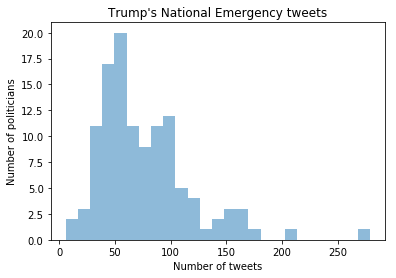

In [24]:
dataAnalysis['Trump\'s National Emergency'].plot.hist(bins=25, alpha=0.5)
f7 = plt.gcf()
plt.title('Trump\'s National Emergency tweets')
plt.xlabel('Number of tweets')
plt.ylabel('Number of politicians')
q1, q3= np.percentile(sorted(dataAnalysis['Trump\'s National Emergency']),[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
#print("lower bound:", lower_bound)
#print("upper bound:", upper_bound)
dataAnalysis['Trump\'s National Emergency'].sort_values(ascending = False)
print("There are 2 outliers that exceed our upper bound of", upper_bound)
print(dataAnalysis.loc[77, 'Name']+ "is an outlier for Trump\'s National Emergency at 279 tweets")
print(dataAnalysis.loc[46, 'Name']+ " is an outlier for Trump\'s National Emergency at 212 tweets")

There are 9 outliers that exceed our upper bound of 116.0
Brenda Lawrence is an outlier at 179 tweets
Deb Dingell is an outlier at 179 tweets
Jackie Speier is an outlier at 165 tweets
Barbra Lee is an outlier at 163 tweets
Katherine Clark is an outlier at 153 tweets
Annie Kuster is an outlier at 144 tweets
Terri Sewell is an outlier at 121 tweets
Suzanne Bonamici is an outlier at 121 tweets
Karen Bass is an outlier at 118 tweets


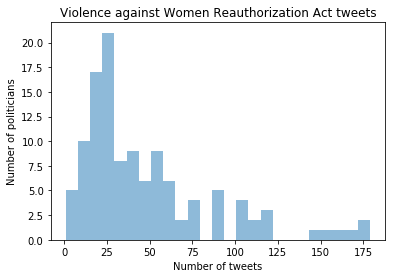

In [25]:
dataAnalysis['Violence against Women Reauthorization Act'].plot.hist(bins=25, alpha=0.5)
f8 = plt.gcf()
plt.title('Violence against Women Reauthorization Act tweets')
plt.xlabel('Number of tweets')
plt.ylabel('Number of politicians')
q1, q3= np.percentile(sorted(dataAnalysis['Violence against Women Reauthorization Act']),[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
#print("lower bound:", lower_bound)
#print("upper bound:", upper_bound)
dataAnalysis['Violence against Women Reauthorization Act'].sort_values(ascending = False)
print("There are 9 outliers that exceed our upper bound of", upper_bound)
print(dataAnalysis.loc[14, 'Name']+ " is an outlier at 179 tweets")
print(dataAnalysis.loc[25, 'Name']+ " is an outlier at 179 tweets")
print(dataAnalysis.loc[40, 'Name']+ " is an outlier at 165 tweets")
print(dataAnalysis.loc[7, 'Name']+ " is an outlier at 163 tweets")
print(dataAnalysis.loc[59, 'Name']+ " is an outlier at 153 tweets")
print(dataAnalysis.loc[5, 'Name']+ " is an outlier at 144 tweets")
print(dataAnalysis.loc[109, 'Name']+ " is an outlier at 121 tweets")
print(dataAnalysis.loc[106, 'Name']+ " is an outlier at 121 tweets")
print(dataAnalysis.loc[58, 'Name']+ " is an outlier at 118 tweets")

In [26]:
billAnalysis['Twt_Count'] = billAnalysis['Tweet'].apply(lambda x: len(x))

count_pivot = billAnalysis.pivot_table(index = 'Name', columns = 'Bill #', values = 'Twt_Count')

In [27]:
q1, q3= np.percentile(sorted(billAnalysis['Twt_Count']),[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print("lower bound:", lower_bound)
print("upper bound:", upper_bound)
billAnalysis['Twt_Count'].sort_values(ascending = False)
#There is no real outliers, Number 96 made less than 100 tweets.
#number 351, 189, and 234 are the only ones that made more than 50000 tweets about our bills.
print("There are 28 outliers that had made more than our upper bound of", upper_bound, "tweets on all our bills")
print(billAnalysis.loc[351, 'Name']+ " made the most tweets at 63260 tweets")
print(billAnalysis.loc[189, 'Name']+ " came in second at 54323 tweets")
print(billAnalysis.loc[234, 'Name']+ " came in third at 50663 tweets")
print(billAnalysis.loc[144, 'Name']+ " is an outlier at 44979 tweets")
print(billAnalysis.loc[310, 'Name']+ " is an outlier at 43396 tweets")
print(billAnalysis.loc[146, 'Name']+ " is an outlier at 42456 tweets")
print(billAnalysis.loc[571, 'Name']+ " is an outlier at 41301 tweets")
print(billAnalysis.loc[289, 'Name']+ " is an outlier at 40368 tweets")
print(billAnalysis.loc[632, 'Name']+ " is an outlier at 39954 tweets")
print(billAnalysis.loc[825, 'Name']+ " is an outlier at 39691 tweets")
print(billAnalysis.loc[252, 'Name']+ " is an outlier at 38667 tweets")
print(billAnalysis.loc[241, 'Name']+ " is an outlier at 37850 tweets")
print(billAnalysis.loc[276, 'Name']+ " is an outlier at 36054 tweets")
print(billAnalysis.loc[139, 'Name']+ " is an outlier at 34778 tweets")
print(billAnalysis.loc[433, 'Name']+ " is an outlier at 33669 tweets")
print(billAnalysis.loc[112, 'Name']+ " is an outlier at 32071 tweets")
print(billAnalysis.loc[871, 'Name']+ " is an outlier at 31810 tweets")
print(billAnalysis.loc[296, 'Name']+ " is an outlier at 30828 tweets")
print(billAnalysis.loc[331, 'Name']+ " is an outlier at 30771 tweets")
print(billAnalysis.loc[202, 'Name']+ " is an outlier at 30761 tweets")
print(billAnalysis.loc[125, 'Name']+ " is an outlier at 29256 tweets")
print(billAnalysis.loc[214, 'Name']+ " is an outlier at 29231 tweets")
print(billAnalysis.loc[306, 'Name']+ " is an outlier at 28751 tweets")
print(billAnalysis.loc[317, 'Name']+ " is an outlier at 28649 tweets")
print(billAnalysis.loc[210, 'Name']+ " is an outlier at 28333 tweets")
print(billAnalysis.loc[141, 'Name']+ " is an outlier at 28168 tweets")
print(billAnalysis.loc[299, 'Name']+ " is an outlier at 28069 tweets")
print(billAnalysis.loc[165, 'Name']+ " is an outlier at 28017 tweets")

lower bound: -11434.5
upper bound: 27571.5
There are 28 outliers that had made more than our upper bound of 27571.5 tweets on all our bills
Terri Sewell made the most tweets at 63260 tweets
Pramila Jayapal came in second at 54323 tweets
Terri Sewell came in third at 50663 tweets
Joe Kennedy is an outlier at 44979 tweets
Barbra Lee is an outlier at 43396 tweets
Kathy Castor is an outlier at 42456 tweets
Robin Kelly is an outlier at 41301 tweets
Brenda Lawrence is an outlier at 40368 tweets
Ro Khanna is an outlier at 39954 tweets
Michael McCaul  is an outlier at 39691 tweets
Jackie Speier is an outlier at 38667 tweets
Katherine Clark is an outlier at 37850 tweets
Deb Dingell is an outlier at 36054 tweets
John Yarmuth is an outlier at 34778 tweets
Marc Veasey is an outlier at 33669 tweets
John Barrasso is an outlier at 32071 tweets
Joaquin Castro is an outlier at 31810 tweets
Annie Kuster is an outlier at 30828 tweets
Suzanne Bonamici is an outlier at 30771 tweets
Nancy Pelosi is an outli

In [29]:
sentimentAnalysis = pd.read_csv('Tweet_Truth/votes_tweets.csv')
sentimentAnalysis
firearmsSent = sentimentAnalysis.loc[sentimentAnalysis['Bill'] == "Background Check for Firearms"]
peopleSent = sentimentAnalysis.loc[sentimentAnalysis['Bill'] == "For the People Act 2019"]
healthSent = sentimentAnalysis.loc[sentimentAnalysis['Bill'] == "Health Care"]
paycheckSent = sentimentAnalysis.loc[sentimentAnalysis['Bill'] == "Paycheck Fairness Act"]
yemenSent = sentimentAnalysis.loc[sentimentAnalysis['Bill'] == "Remove Troops from Yemen"]
internetSent = sentimentAnalysis.loc[sentimentAnalysis['Bill'] == "Save the Internet"]
TrumpSent = sentimentAnalysis.loc[sentimentAnalysis['Bill'] == "Trump\'s National Emergency"]
WomenSent = sentimentAnalysis.loc[sentimentAnalysis['Bill'] == "Violence against Women Reauthorization Act"]


In [30]:
q1, q3= np.percentile(sorted(firearmsSent['Average']),[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print("lower bound:", lower_bound)
print("upper bound:", upper_bound)
#print(firearmsSent['Average'].sort_values(ascending = False))
print("No outliers for average sentiment score on Background Check for Firearms bill")

lower bound: -0.25313040103978535
upper bound: 0.39024559160116545
No outliers for average sentiment score on Background Check for Firearms bill


In [31]:
q1, q3= np.percentile(sorted(peopleSent['Average']),[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print("lower bound:", lower_bound)
print("upper bound:", upper_bound)
#print(peopleSent['Average'].sort_values(ascending = False))
print(peopleSent.loc[331, 'Name'] + " is an outlier exceding our lower bound at", lower_bound, ", having the lowest sentiment average at",peopleSent.loc[331, 'Average']," on For the People Act 2019 bill")

lower bound: -0.3507462729820816
upper bound: 0.21044776401417217
steve stivers is an outlier exceding our lower bound at -0.3507462729820816 , having the lowest sentiment average at -0.4153846162888739  on For the People Act 2019 bill


In [32]:
q1, q3= np.percentile(sorted(healthSent['Average']),[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print("lower bound:", lower_bound)
print("upper bound:", upper_bound)
healthSent['Average'].sort_values(ascending = False)
print("no outliers for Health Care bill")

lower bound: -0.46628788006350863
upper bound: 0.2215909079055895
no outliers for Health Care bill


In [33]:
q1, q3= np.percentile(sorted(paycheckSent['Average']),[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print("lower bound:", lower_bound)
print("upper bound:", upper_bound)
paycheckSent['Average'].sort_values(ascending = False)
print(paycheckSent.loc[275, 'Name'] + " is an outlier exceding our lower bound at", lower_bound, ", having the lowest sentiment average at", paycheckSent.loc[275, 'Average']," on Paycheck Fairness Act bill")

lower bound: -0.521284814372486
upper bound: 0.35858284832555676
devin nunes is an outlier exceding our lower bound at -0.521284814372486 , having the lowest sentiment average at -0.699999988079071  on Paycheck Fairness Act bill


In [34]:
q1, q3= np.percentile(sorted(yemenSent['Average']),[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print("lower bound:", lower_bound)
print("upper bound:", upper_bound)
yemenSent['Average'].sort_values(ascending = False)
print(yemenSent.loc[590, 'Name'] + " is an outlier exceding our upper bound at", upper_bound, ", having the highest sentiment average at", yemenSent.loc[590, 'Average']," on Remove Troops from Yemen bill")

lower bound: -0.8563631332228675
upper bound: 0.5567590560799893
devin nunes is an outlier exceding our upper bound at 0.5567590560799893 , having the highest sentiment average at 0.8999999761581421  on Remove Troops from Yemen bill


In [35]:
q1, q3= np.percentile(sorted(internetSent['Average']),[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print("lower bound:", lower_bound)
print("upper bound:", upper_bound)
internetSent['Average'].sort_values(ascending = False)
print("There are 2 outliers one that exceeds our upper bound and one that is lower than our lower bound")
print(internetSent.loc[92, 'Name'] + " is an outlier, having the highest sentiment average at .7 for Save the Internet bill")
print(internetSent.loc[97, 'Name'] + " is an outlier, having the lowest sentiment average at -.7 for Save the Internet bill")

lower bound: -0.6501545426282254
upper bound: 0.6074004210941084
There are 2 outliers one that exceeds our upper bound and one that is lower than our lower bound
adrian smith is an outlier, having the highest sentiment average at .7 for Save the Internet bill
sean duffy is an outlier, having the lowest sentiment average at -.7 for Save the Internet bill


In [36]:
q1, q3= np.percentile(sorted(TrumpSent['Average']),[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print("lower bound:", lower_bound)
print("upper bound:", upper_bound)
TrumpSent['Average'].sort_values(ascending = False)
print("There are no outliers for Trump\'s National Emergency bill")

lower bound: -0.5100419444999619
upper bound: 0.1795570817462374
There are no outliers for Trump's National Emergency bill


In [37]:
q1, q3= np.percentile(sorted(WomenSent['Average']),[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print("lower bound:", lower_bound)
print("upper bound:", upper_bound)
WomenSent['Average'].sort_values(ascending = False)
print(WomenSent.loc[699, 'Name'] + " is an outlier, having the highest sentiment average at .5, which is higher than our upper bound", upper_bound, "for Violence against Women Reauthorization Act bill")

lower bound: -0.990510186641699
upper bound: 0.4129455626921523
mark green is an outlier, having the highest sentiment average at .5, which is higher than our upper bound 0.4129455626921523 for Violence against Women Reauthorization Act bill


In [40]:
govtrack = pd.read_csv('Tweet_Truth/govtrack.csv')
govtrack['vote'] = govtrack['vote'].apply(lambda x: 0 if x == -1 else -1 if x == 0 else x)
govtrack.columns = ['State', 'Vote', 'Name', 'Party', 'Bill']
govtrack

,State,Vote,Name,Party,Bill
0,OR,1,earl blumenauer,D,Paycheck Fairness Act
1,TX,-1,kevin brady,R,Paycheck Fairness Act
2,MD,1,elijah cummings,D,Paycheck Fairness Act
3,CO,1,diana degette,D,Paycheck Fairness Act
4,FL,1,mario diaz-balart,R,Paycheck Fairness Act
5,TX,0,kay granger,R,Paycheck Fairness Act
6,MD,1,steny hoyer,D,Paycheck Fairness Act
7,OH,1,marcy kaptur,D,Paycheck Fairness Act
8,IA,-1,steve king,R,Paycheck Fairness Act
9,GA,1,john lewis,D,Paycheck Fairness Act


In [41]:
firearmsGov = govtrack.loc[govtrack['Bill'] == "Background Check for Firearms"]
peopleGov = govtrack.loc[govtrack['Bill'] == "For the People Act 2019"]
healthGov = govtrack.loc[govtrack['Bill'] == "Health Care"]
paycheckGov = govtrack.loc[govtrack['Bill'] == "Paycheck Fairness Act"]
yemenGov = govtrack.loc[govtrack['Bill'] == "Remove Troops from Yemen"]
internetGov = govtrack.loc[govtrack['Bill'] == "Save the Internet"]
TrumpGov = govtrack.loc[govtrack['Bill'] == "Trump\'s National Emergency"]
WomenGov = govtrack.loc[govtrack['Bill'] == "Violence against Women Reauthorization Act"]

In [42]:
firearmsGov.loc[firearmsGov['Vote'] == 0]

,State,Vote,Name,Party,Bill
100,IA,0,steve king,R,Background Check for Firearms


In [43]:
peopleGov.loc[peopleGov['Vote'] == 0]

,State,Vote,Name,Party,Bill
224,OH,0,steve stivers,R,For the People Act 2019


In [44]:
healthGov.loc[healthGov['Vote'] == 0]

,State,Vote,Name,Party,Bill
472,OH,0,tim ryan,D,Health Care
499,OH,0,steve stivers,R,Health Care


In [45]:
paycheckGov.loc[paycheckGov['Vote'] == 0]

,State,Vote,Name,Party,Bill
5,TX,0,kay granger,R,Paycheck Fairness Act


In [46]:
yemenGov.loc[yemenGov['Vote'] == 0]

,State,Vote,Name,Party,Bill
555,TX,0,kay granger,R,Remove Troops from Yemen
564,OH,0,tim ryan,D,Remove Troops from Yemen
617,MA,0,katherine clark,D,Remove Troops from Yemen


In [47]:
internetGov.loc[internetGov['Vote'] == 0]

,State,Vote,Name,Party,Bill
667,VT,0,peter welch,D,Save the Internet
671,TX,0,pete olson,R,Save the Internet
719,TX,0,brian babin,R,Save the Internet


In [48]:
TrumpGov.loc[TrumpGov['Vote'] == 0]

,State,Vote,Name,Party,Bill
280,TX,0,kay granger,R,Trump's National Emergency
302,CA,0,jackie speier,D,Trump's National Emergency


In [49]:
WomenGov.loc[WomenGov['Vote'] == 0]

,State,Vote,Name,Party,Bill
372,TX,0,kay granger,R,Violence against Women Reauthorization Act
380,OH,0,tim ryan,D,Violence against Women Reauthorization Act
433,MA,0,katherine clark,D,Violence against Women Reauthorization Act


In [50]:
noVotesData = [['steve king', 1], ['steve stivers', 2], ['tim ryan', 3],['jackie speier', 1], ['kay granger', 4], ['katherine clark', 2], ['peter welch', 1], ['pete olson', 1], ['brian babin', 1]]
noVotes = pd.DataFrame(noVotesData, columns = ['Name', 'Sin_Count'])
q1, q3= np.percentile(sorted(noVotes['Sin_Count']),[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print("lower bound:", lower_bound)
print("upper bound:", upper_bound)
print("kay granger is the ultimate voting sinner on all our bills at 4 abstained votes exceeding the upper bound of 3.5")
noVotes

lower bound: -0.5
upper bound: 3.5
kay granger is the ultimate voting sinner on all our bills at 4 abstained votes exceeding the upper bound of 3.5


,Name,Sin_Count
0,steve king,1
1,steve stivers,2
2,tim ryan,3
3,jackie speier,1
4,kay granger,4
5,katherine clark,2
6,peter welch,1
7,pete olson,1
8,brian babin,1


# Ethics & Privacy

In order to web scrape Twitter for the tweet history of each congressman/woman, a Twitter Developer Account had to be requested from the company. Once this step was completed, we had the permission to collect all the Twitter data we needed to formulate the dataset. As for the GovTrack datasets, the CSV files, containing the votes on a bill from each House of Representatives, are public records (since the transparency of representatives voting record is vital for maintaining a representative democracy) no permission was needed.  

In terms of privacy, this was not an issue for the GovTrack files since the CSV files are online and downloadable with no usage restrictions.  As for using the Twitter API and the tweepy library, there was a restriction on the number of page requests that could be made in an hourly basis. Thus, curating the dataset required the sleep function to be used to stay within Twitter’s allowance of web scraping.

Working on this type of problem involved various challenges in terms of answering our data science question without bias. To best represent the population we are studying, the following steps were completed: an even number of representatives were selected from both the Democratic and Republican party; a systematic way of selecting which of the 435 politicians from the House of Representatives to use for analysis was specified (those with the most tweets and followers).  As for selecting which of the bills voted on in the House were used for analysis: the bills that had the most divide were used i.e. there was a near even split of votes.  This method of selecting bills was advantageous since it avoided biasedly selecting bills introduced to the house disproportionately by one party.  However, there was a significant issue in terms of how to filter the Tweet data.  The list of key words belonging to each bill were accumulated by taking key words in each of the bill statements and from analyzing the most popular results from searching each of the bills on Twitter. Whether or not Twitter has algorithm bias in their search results was out of the project’s scope of control; however, selecting the hashtags from these search results left room for human bias to unintendedly select a biased list of words and hashtags.  This was a challenge to the project since the poor execution of the step would skew the data set by disproportionately containing tweets predominantly from one side of the vote. However, since this was an issue raised before curating this list of key words, emphasis was places on analyzing tweets from both parties. 

# Conclusion & Discussion

*Fill in your discussion information here*